<a href="https://colab.research.google.com/github/clarshine/matkul-visualisasi-data/blob/main/Tugas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS 2 MATKUL VISUALISASI DATA** 📚

# **READ, CLEAN AND VALIDATE**

In [1]:
!pip install empiricaldist #Install the missing modules empiricaldist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.8.0-py3-none-any.whl size=12585 sha256=28a3d7fa9552c4ee47c2e31c018804e1ff518c511026470ec093e491b6e1c443
  Stored in directory: /root/.cache/pip/wheels/ca/a9/1f/90c7a8a37ac37ff0fa0a27b2152f9b24be8910448ab93992f8
Successfully built empiricaldist


In [2]:
nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')

In [7]:
# Menampilkan jumlah baris dan kolom pada dataset
print(nsfg.shape)

# Menampikan nama/judul kolom
print(nsfg.columns)

# Assign kolom birthwgt_oz1 ke ounces
ounces = nsfg['birthwgt_oz1']

# Print 5 elemen pertama di ounces
print(ounces.head(5))

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


## **Clean and Validate**

### **Membersihkan variable**

In [8]:
# Print value di kolom nbrnaliv dan frekuensi dari tiap value
nsfg['nbrnaliv'].value_counts()

,count
nbrnaliv,
1.0,6379
2.0,100
3.0,5


In [12]:
# Mengganti value 8 dengan NaN
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

print(nsfg['nbrnaliv'].value_counts())

nbrnaliv
1.0    6379
2.0     100
3.0       5
Name: count, dtype: int64


<ipython-input-12-d403f419bae1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)


## **Compute a variable**

In [14]:
#Deskripsi statisika dari kolom agepreg
nsfg['agepreg'].describe()

,agepreg
count,9109.000000
mean,2494.934570
std,578.099231
min,825.000000
25%,2041.000000
50%,2416.000000
75%,2900.000000
max,4350.000000


In [15]:
# Memilih kolom agecon. dan agepreg lalu dibagi dengan 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Hitung selisihnya
preg_length = agepreg - agecon

# Deskripsi statisik
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


## **Filter and visualize**

### **Buat histogram**

Text(0, 0.5, 'Number of pregnancies')

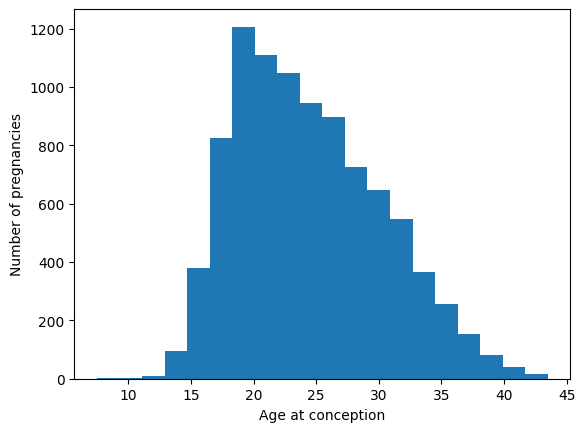

In [16]:
# Buat plot histogram
plt.hist(agecon, bins=20)

# Beri label pada sumbu-sumbunya
plt.xlabel("Age at conception")
plt.ylabel('Number of pregnancies')

Text(0, 0.5, 'Number of pregnancies')

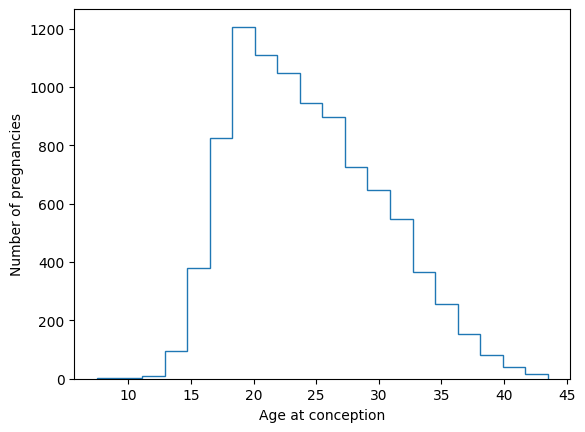

In [17]:
# Buat plot histogram
plt.hist(agecon, bins=20, histtype='step')

# Beri label pada sumbu-sumbunya
plt.xlabel("Age at conception")
plt.ylabel('Number of pregnancies')

In [22]:
def resample_rows_weighted(df, column='wgt2013_2015'):
    """Mengambil sampel ulang (resample) dari sebuah DataFrame dengan probabilitas yang sebanding dengan kolom yang diberikan.
  Argumen:
    df: DataFrame
    column: nama kolom (string) yang digunakan sebagai bobot (weights)
  Mengembalikan:
    DataFrame
    """
    weights = df[column].copy()
    weights /= sum(weights)
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

### **Compute birth weight**

In [23]:
# Resample data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Membersihkan variable berat seperti pounds dan ounces
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Hitung berat lahir
birth_weight = pounds + ounces/16

In [24]:
# Buat Boolean untuk bayi tidak prematur
full_term = nsfg['prglngth'] >= 37

# Assign ke variable full_term_weight
full_term_weight = birth_weight[full_term]

# Hitung rata-rata(mean)-nya
print(full_term_weight.mean())

7.552546327380153


### **Filter**

In [25]:
# Filter bayi tidak prematur
full_term = nsfg['prglngth'] >= 37

# Filter kelahiran tunggal
single = nsfg['nbrnaliv'] == 1

# Hitung berat kelahiran untuk bayi tidak prematur dengan kelahiran tunggal
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Hitung berat kelahiran untuk bayi tidak prematur dengan kelahiran multiple
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.560326819407008
Multiple full-term mean: 5.414351851851852


# **RELATIONSHIP**

## **Exploring Relationship**

### **PMF of age**

In [26]:
brfss_original = pd.read_hdf('brfss.hdf5', 'brfss')

Text(0, 0.5, 'PMF')

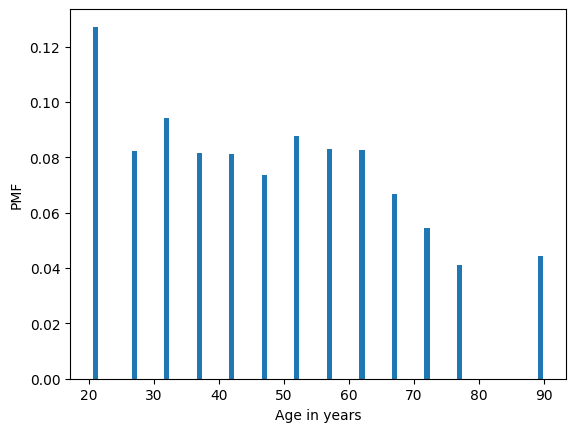

In [27]:
# Ekstrak age
age = Pmf.from_seq(brfss_original['AGE'])

# Buat Plot PMF
age.bar()

# Beri label ke sumbu-sumbunya
plt.xlabel('Age in years')
plt.ylabel('PMF')

### **Scatter Plot**

Text(0, 0.5, 'Weight in kg')

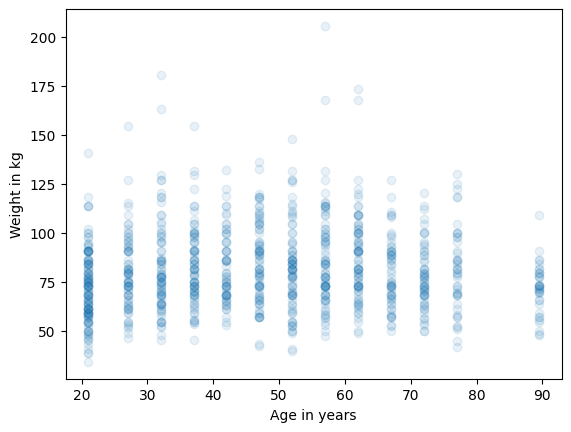

In [28]:
# Ambil 1000 responden pertama
brfss = brfss_original[:1000]

# Ekstrak age dan weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Buat scatter plotnya
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

### **Jittering**

Text(0, 0.5, 'Weight in kg')

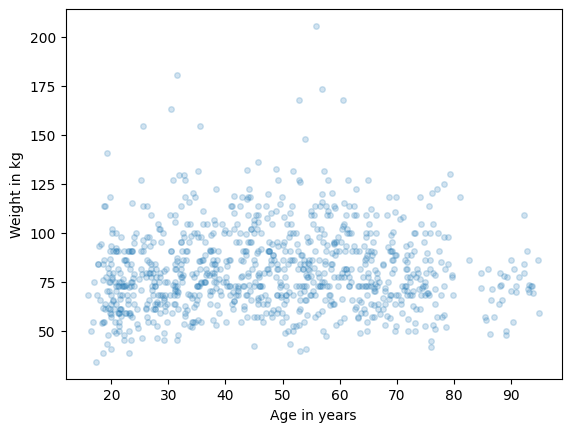

In [29]:
# Ambil 1000 responden pertama
brfss = brfss_original[:1000]

# Tambahkan jittering ke age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Ekstrak weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=4, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

## **Visualizing relationships**

### **Height dan Weight**

Text(0, 0.5, 'Weight in kg')

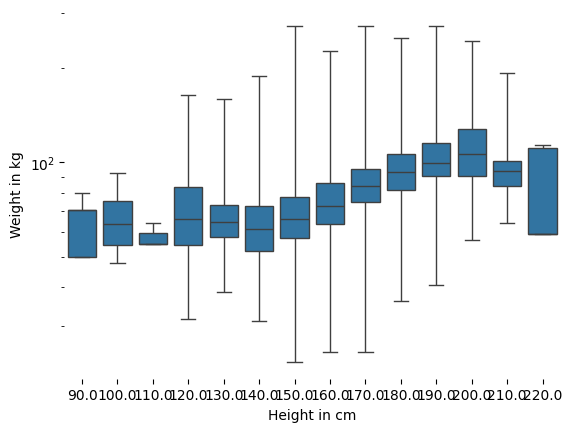

In [30]:
# Hapus baris dengan data yang hilang
data = brfss_original.dropna(subset=['_HTMG10', 'WTKG3'])

# Buat box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot sumbu y dengan skala logaritma
plt.yscale('log')

# Hapus yang tidak diperlukan dan beri label pada sumbu
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

### **Distribution of income**

Text(0, 0.5, 'PMF')

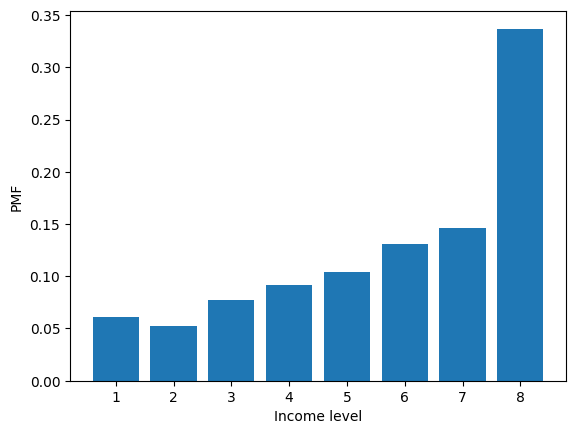

In [31]:
# Ekstrak income
income = brfss_original['INCOME2']

# Plot PMF
Pmf.from_seq(income).bar()

# Label sumbunya
plt.xlabel('Income level')
plt.ylabel('PMF')

### **Income and height**

Text(0, 0.5, 'Height in cm')

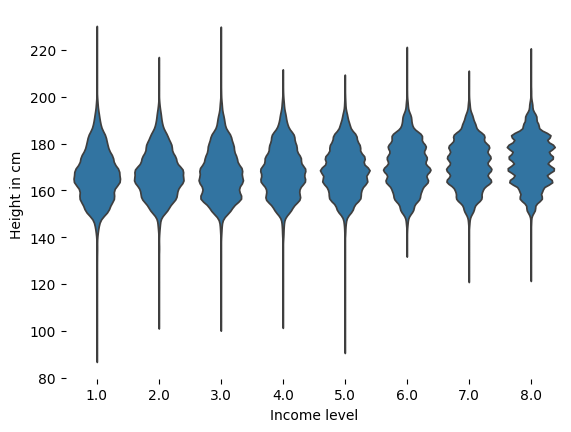

In [32]:
# Hapus baris dengan data yang hilang
data = brfss_original.dropna(subset=['INCOME2', 'HTM4'])

# Buat violin plot
sns.violinplot(x = 'INCOME2', y='HTM4', data=data, inner=None)

# Hapus yang tidak diperlukan dan beri label pada sumbu
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')

## **Correlation**

### **Computing correlations**

In [33]:
# Pilih kolom
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss_original[columns]

# Matriks korelasi
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.015158 -0.009834
INCOME2  -0.015158  1.000000  0.119670
_VEGESU1 -0.009834  0.119670  1.000000


## **Simple regression**

### **Income and vegetables**

In [34]:
from scipy.stats import linregress

In [35]:
# Ekstrak variable-variblenya
subset = brfss_original.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Regresi linear
res = linregress(xs, ys)
print(res)

LinregressResult(slope=np.float64(0.06988048092105019), intercept=np.float64(1.5287786243363106), rvalue=np.float64(0.11967005884864107), pvalue=np.float64(1.378503916247615e-238), stderr=np.float64(0.002110976356332332), intercept_stderr=np.float64(0.013196467544093602))


### **Fit a line**

(0.0, 6.0)

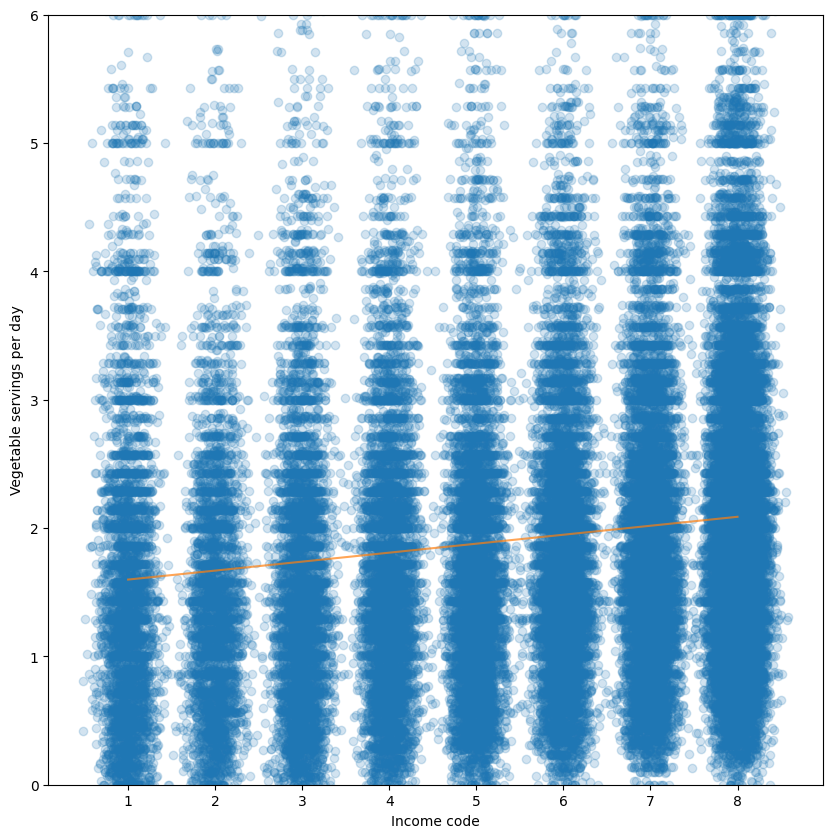

In [36]:
plt.figure(figsize=(10, 10))
# Scatter plot
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])